# Testing for LSPort

# Packages

In [1]:
from LSPort import *

import pandas as pd
import yfinance as yf
import datetime as dt

# Collect Data

In [2]:
try:
    
    df_tech = pd.read_parquet(
        path = "tech.parquet",
        engine = "pyarrow")
    
    df_car = pd.read_parquet(
        path = "car.parquet",
        engine = "pyarrow")
    
    df_fi = pd.read_parquet(
        path = "fi.parquet",
        engine = "pyarrow")
    
except:

    tech_tickers = ["AAPL", "AMZN", "QQQ"]
    car_tickers = ["GM", "F", "SPY"]
    fi_tickers = ["ANGL", "HYG", "TLT"]
    combined_tickers = tech_tickers + car_tickers + fi_tickers
    end_date = dt.date.today()
    start_date = dt.date(year = end_date.year - 10, month = 1, day = 1)

    df_main = (yf.download(
        tickers = combined_tickers,
        start = start_date,
        end = end_date)
        [["Adj Close"]].
        reset_index().
        melt(id_vars = "Date").
        drop(columns = ["variable_0"]))
    
    df_tech = (df_main.query(
        "variable_1 == @tech_tickers").
        pivot(index = "Date", columns = "variable_1", values = "value"))
    
    df_car = (df_main.query(
        "variable_1 == @car_tickers").
        pivot(index = "Date", columns = "variable_1", values = "value"))
    
    df_fi = (df_main.query(
        "variable_1 == @fi_tickers").
        pivot(index = "Date", columns = "variable_1", values = "value"))

    df_tech.to_parquet(
        path = "tech.parquet",
        engine = "pyarrow")
    
    df_car.to_parquet(
        path = "car.parquet",
        engine = "pyarrow")
    
    df_fi.to_parquet(
        path = "fi.parquet",
        engine = "pyarrow")

# Long AAPL short AMZN hedging beta via QQQ

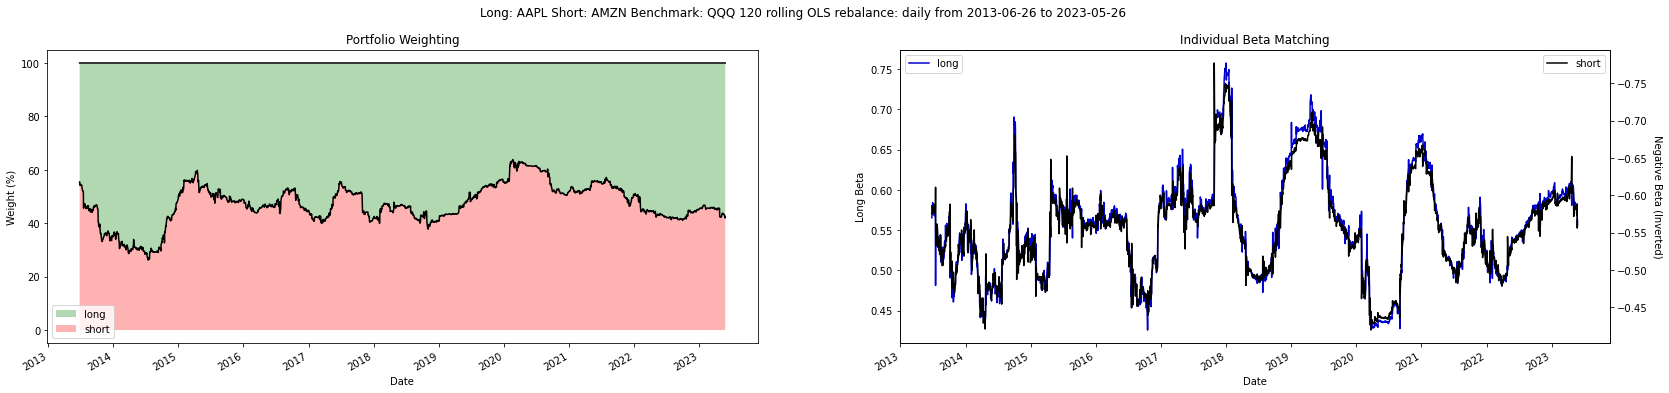

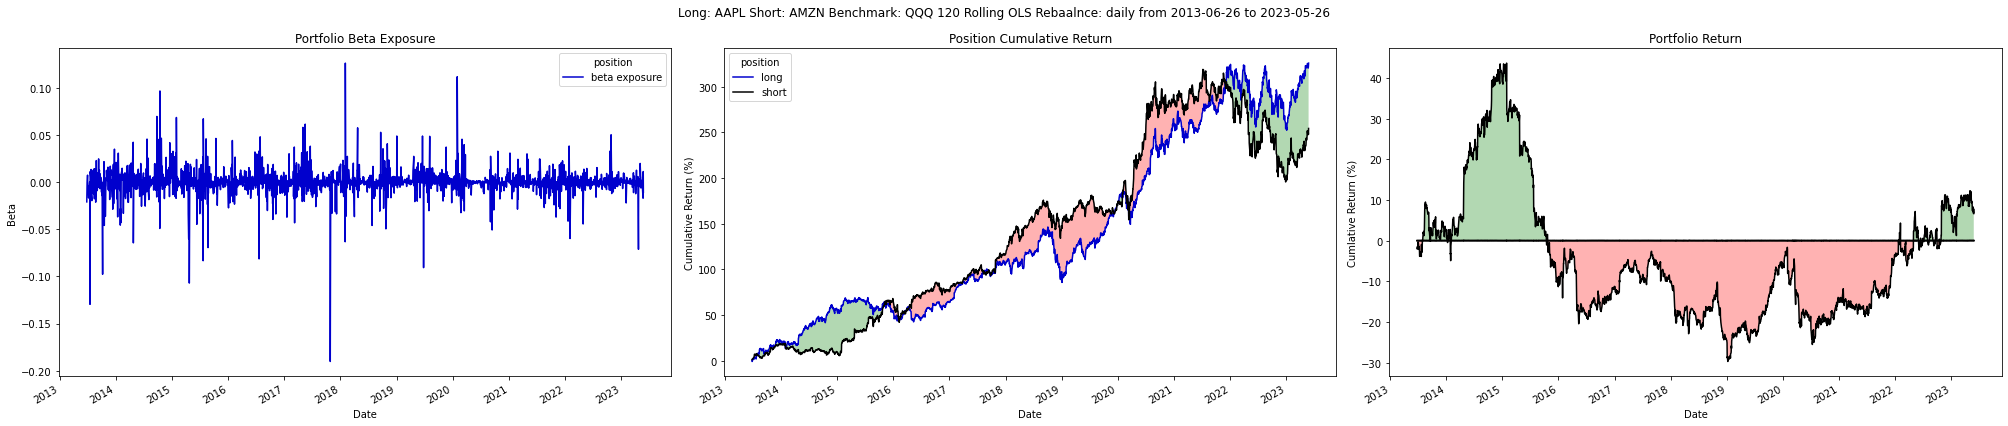

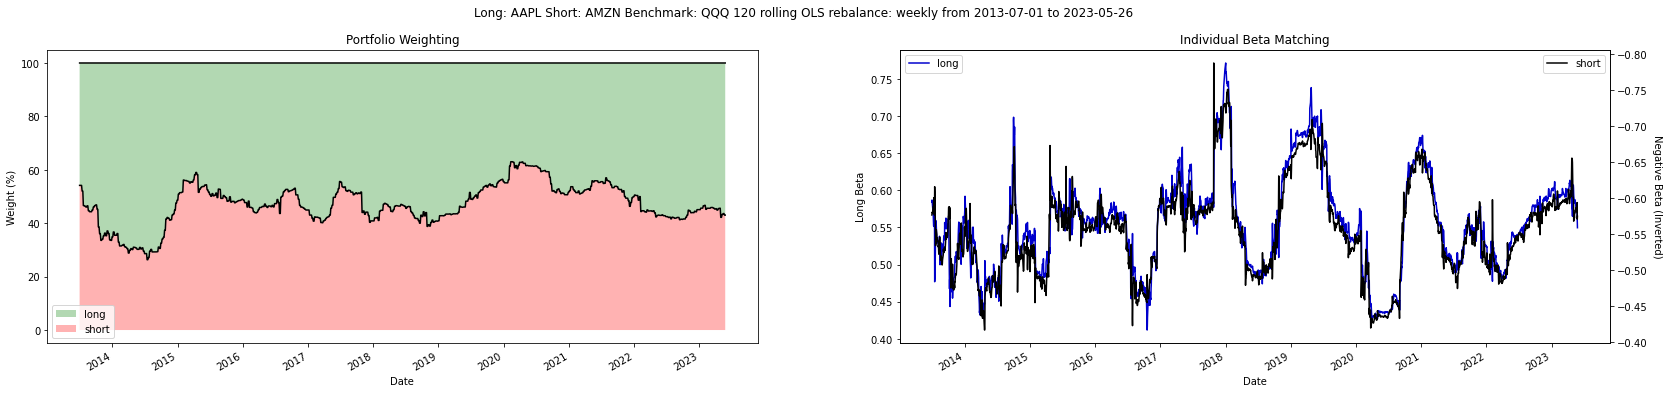

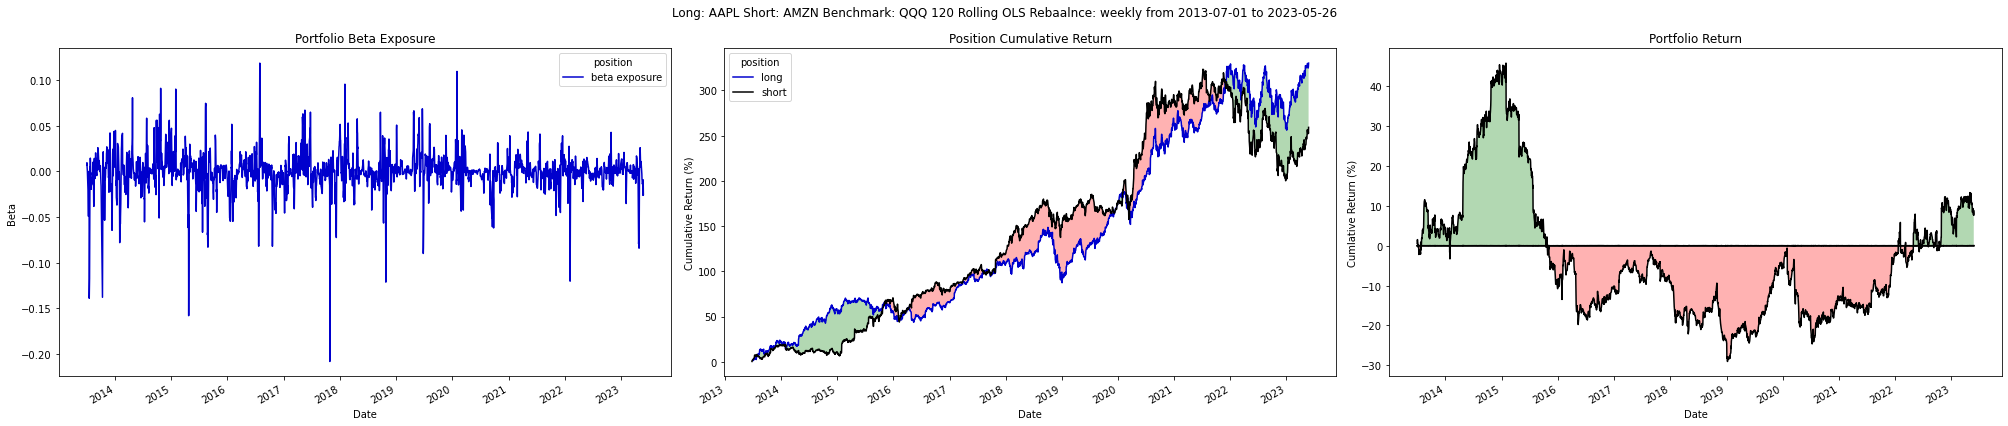

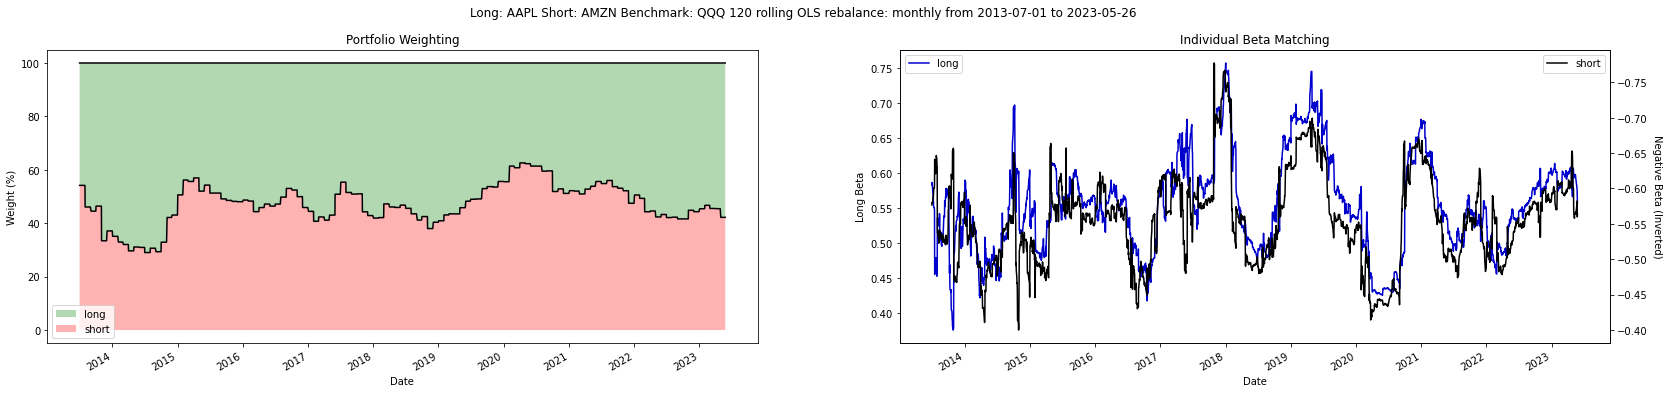

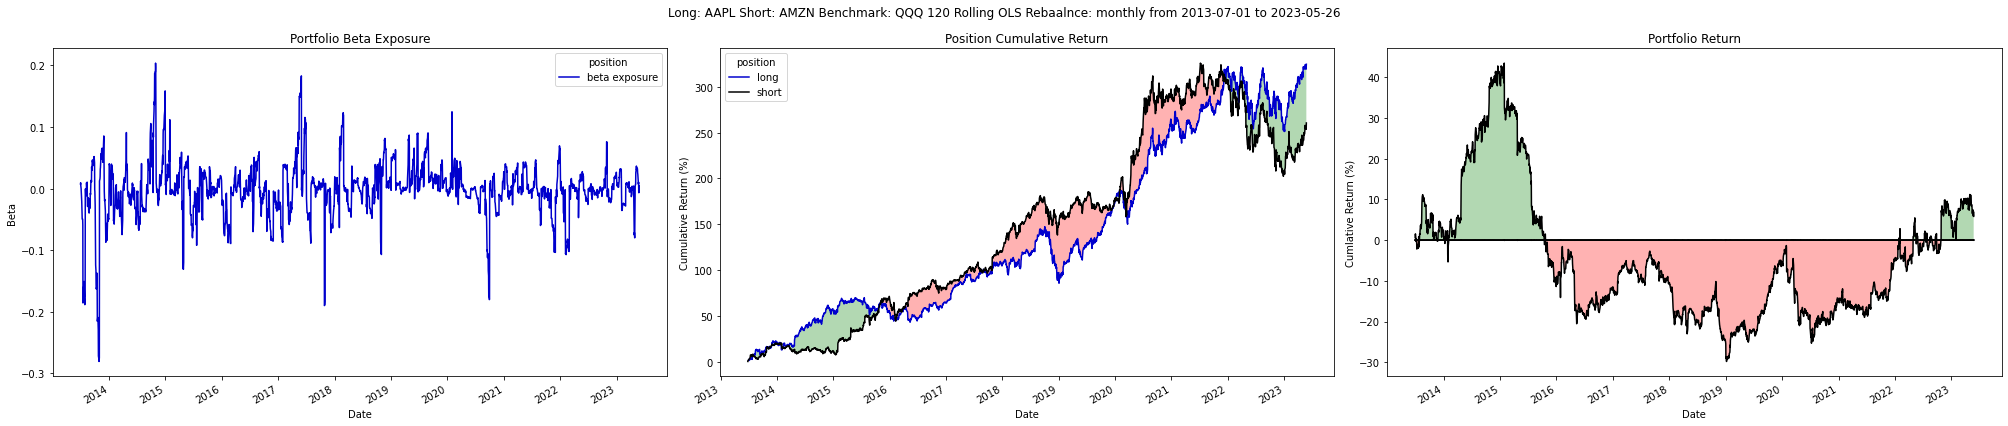

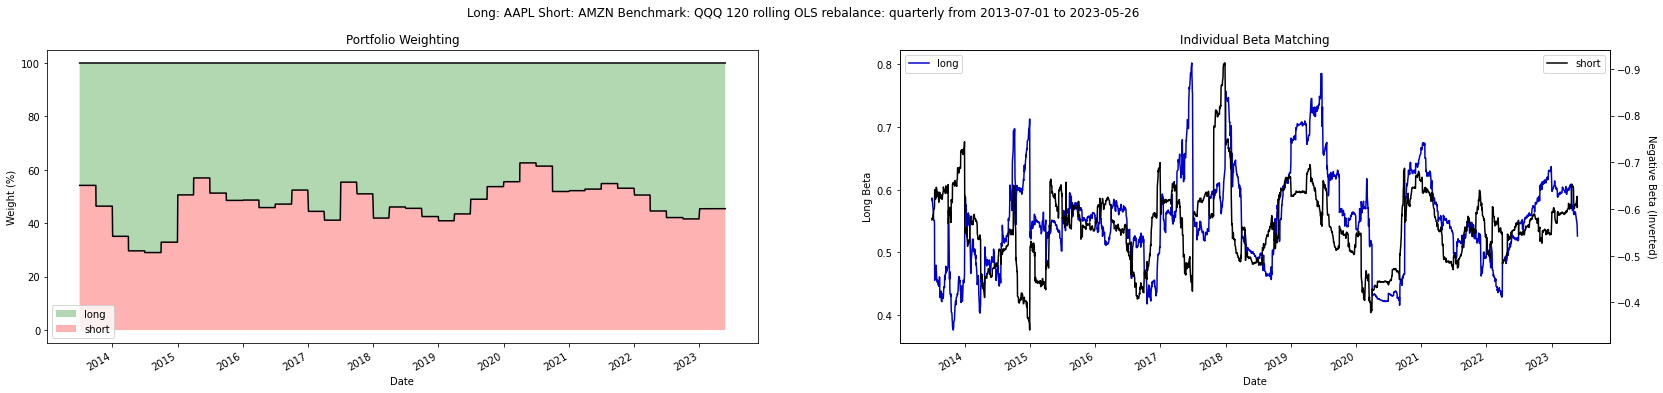

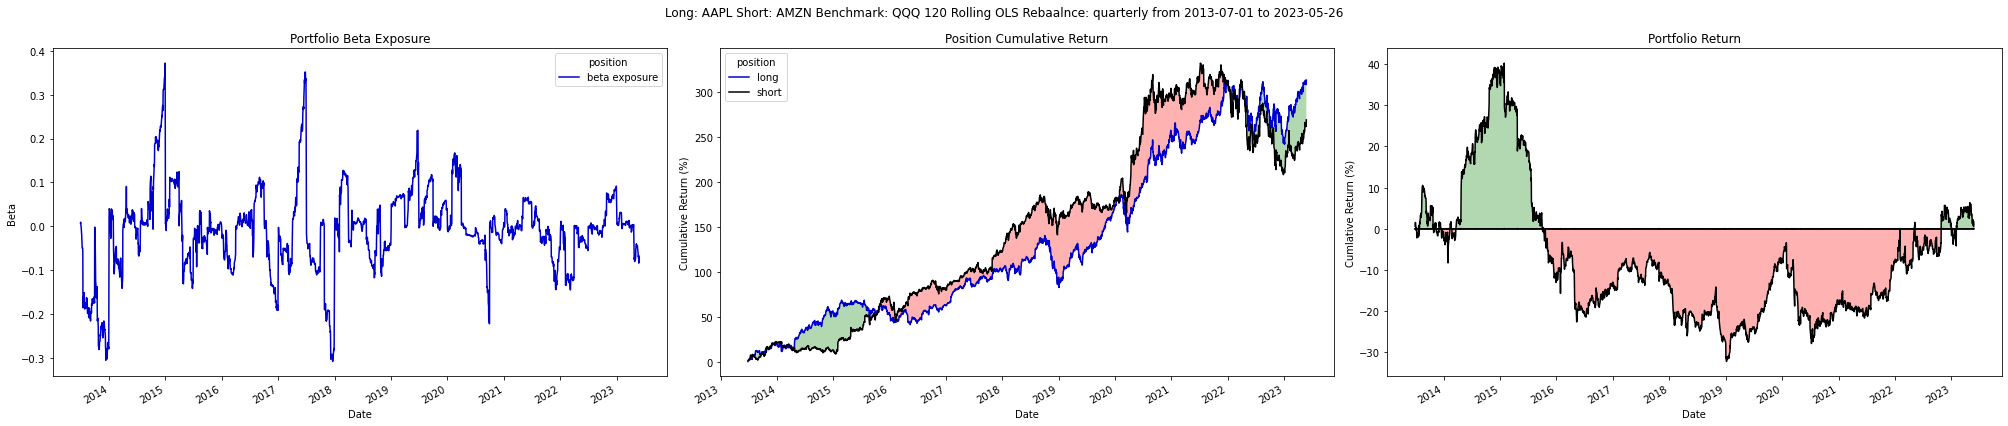

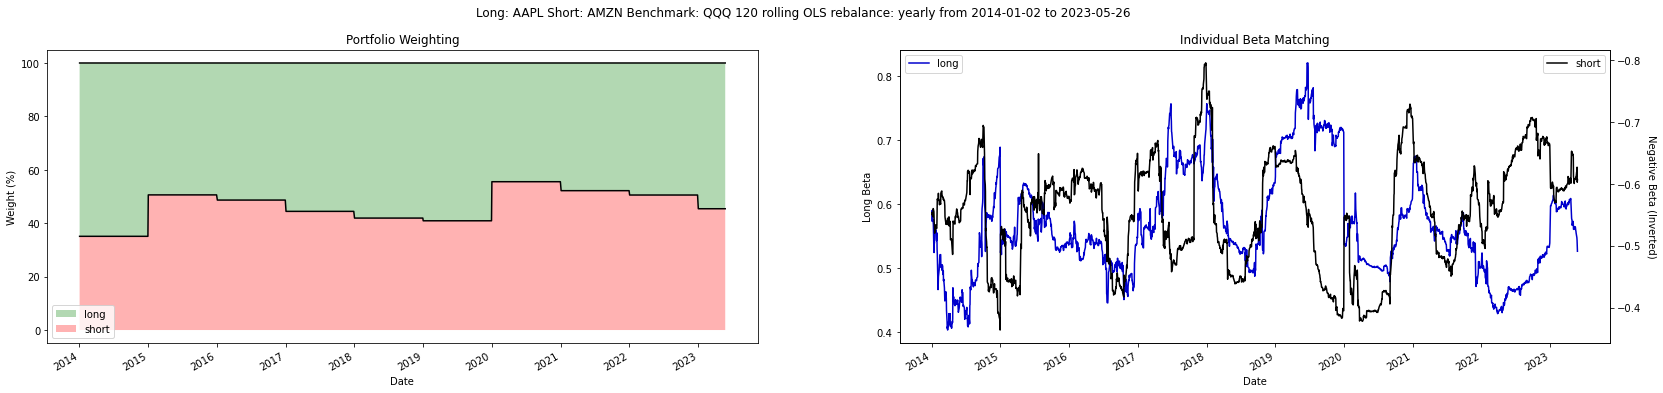

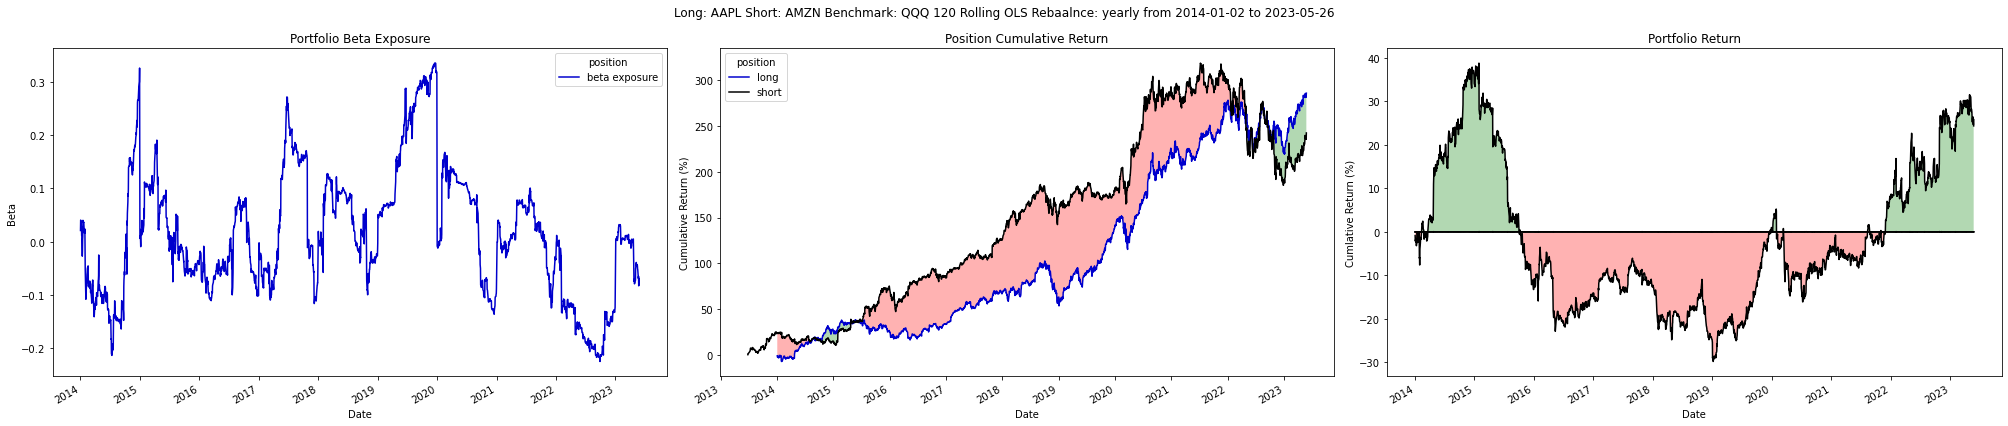

In [3]:
ls_port_tech = LSPort(
    long_position = df_tech.AAPL,
    short_position = df_tech.AMZN,
    benchmark = df_tech.QQQ)

ls_port_tech_weight = ls_port_tech.plot_position_rebalance(
    lookback_window = 120,
    rebalance_method = "daily")

ls_port_tech_weight = ls_port_tech.plot_position_rebalance(
    lookback_window = 120,
    rebalance_method = "weekly")

ls_port_tech_weight = ls_port_tech.plot_position_rebalance(
    lookback_window = 120,
    rebalance_method = "monthly")

ls_port_tech_weight = ls_port_tech.plot_position_rebalance(
    lookback_window = 120,
    rebalance_method = "quarterly")

ls_port_tech_weight = ls_port_tech.plot_position_rebalance(
    lookback_window = 120,
    rebalance_method = "yearly")

# Long General Motors Short Ford hedging beta via SPY

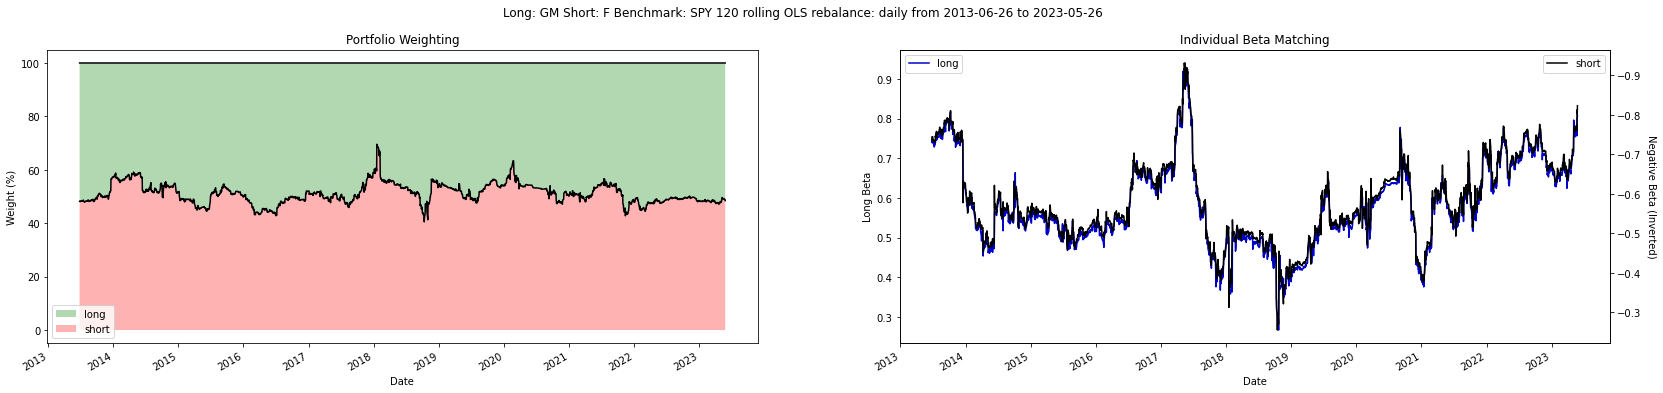

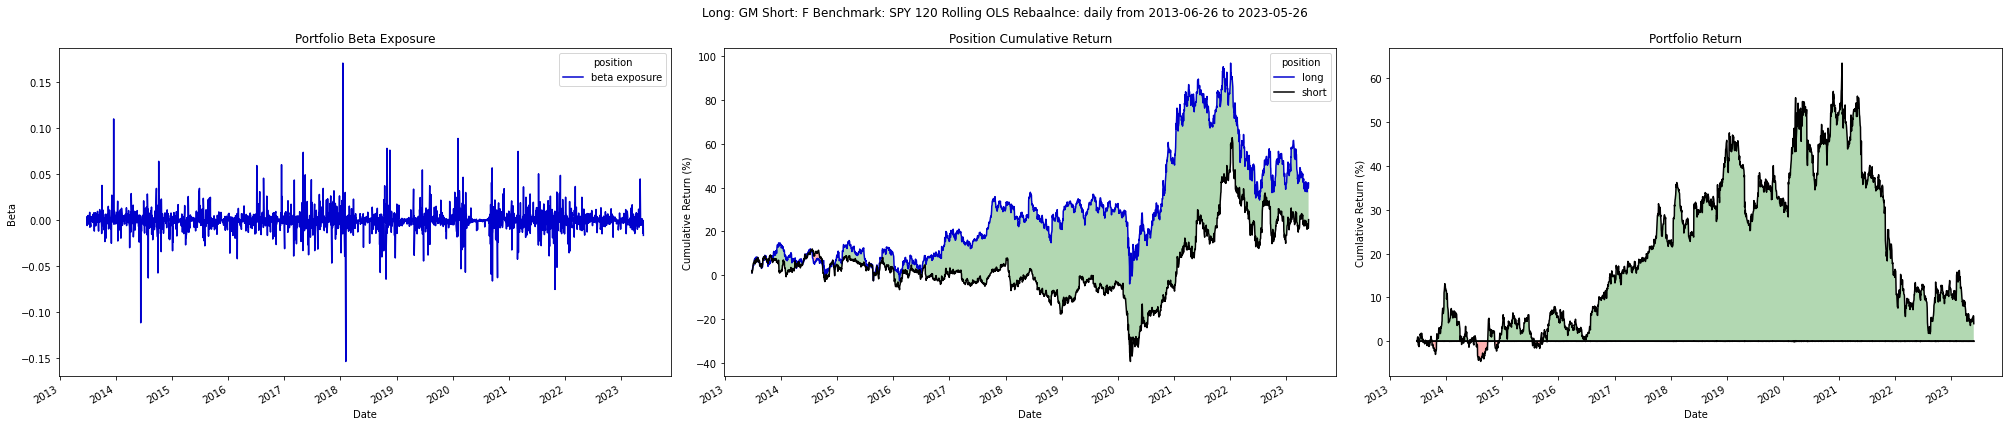

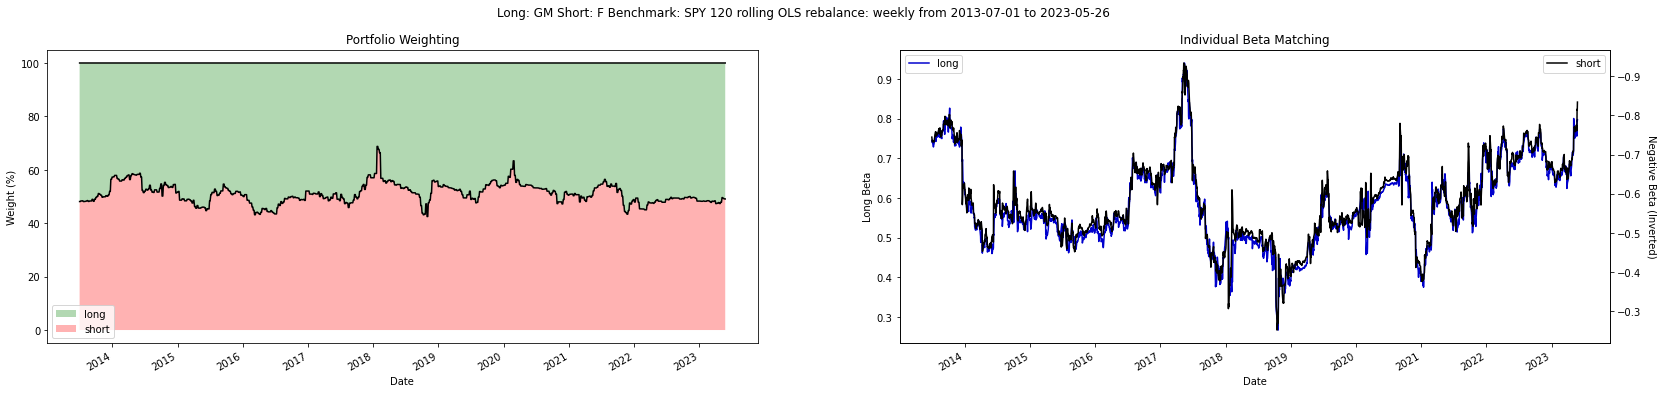

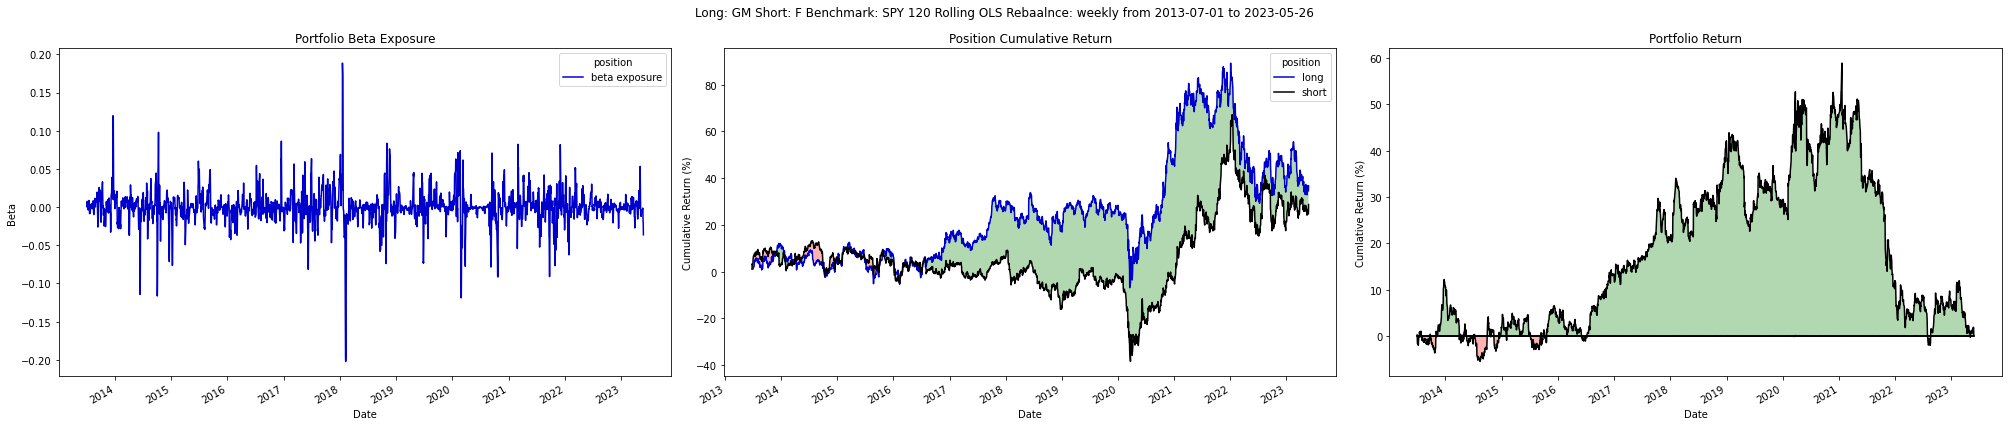

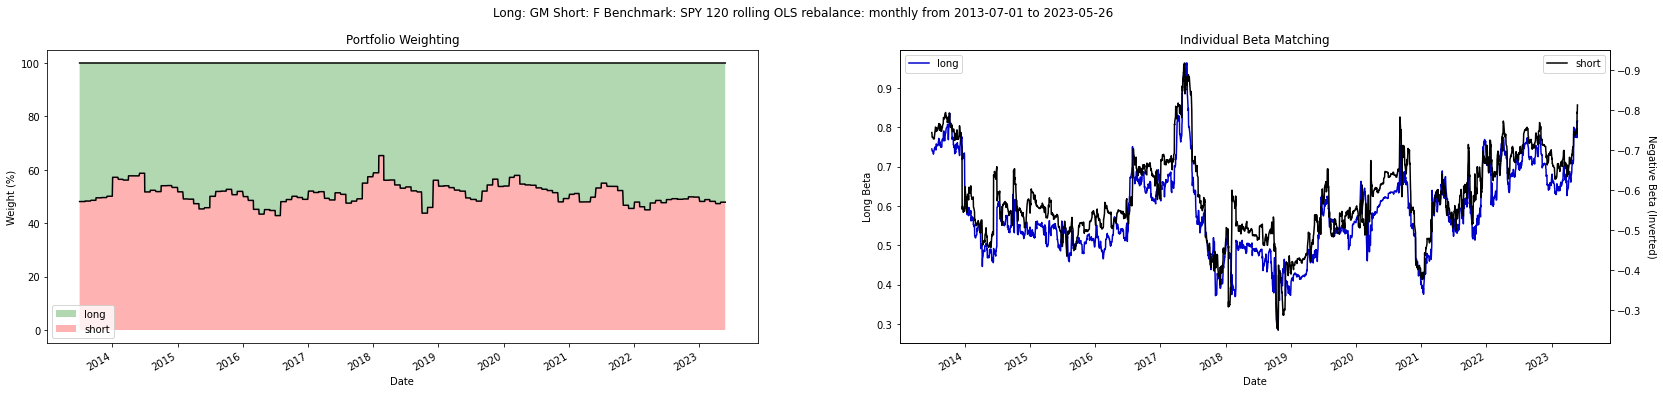

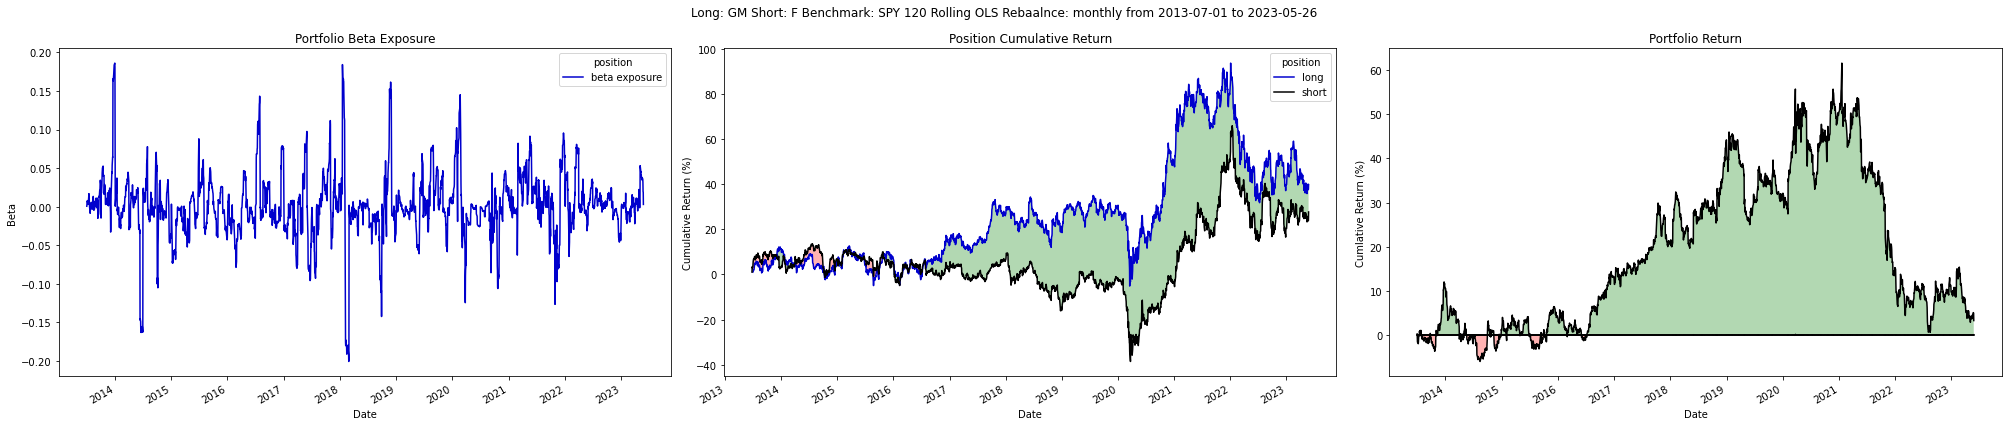

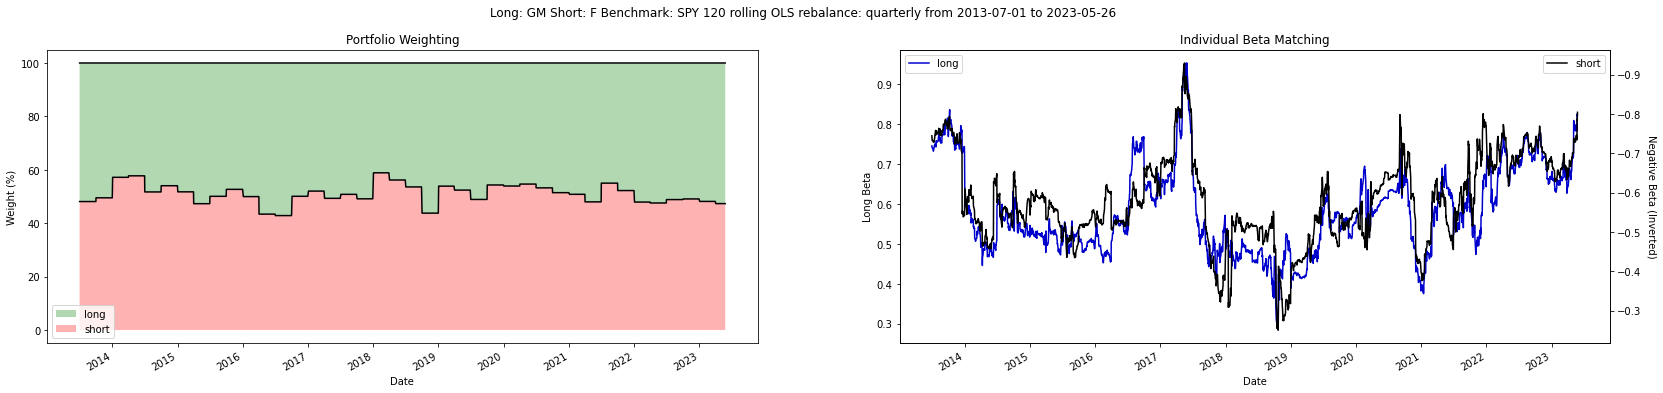

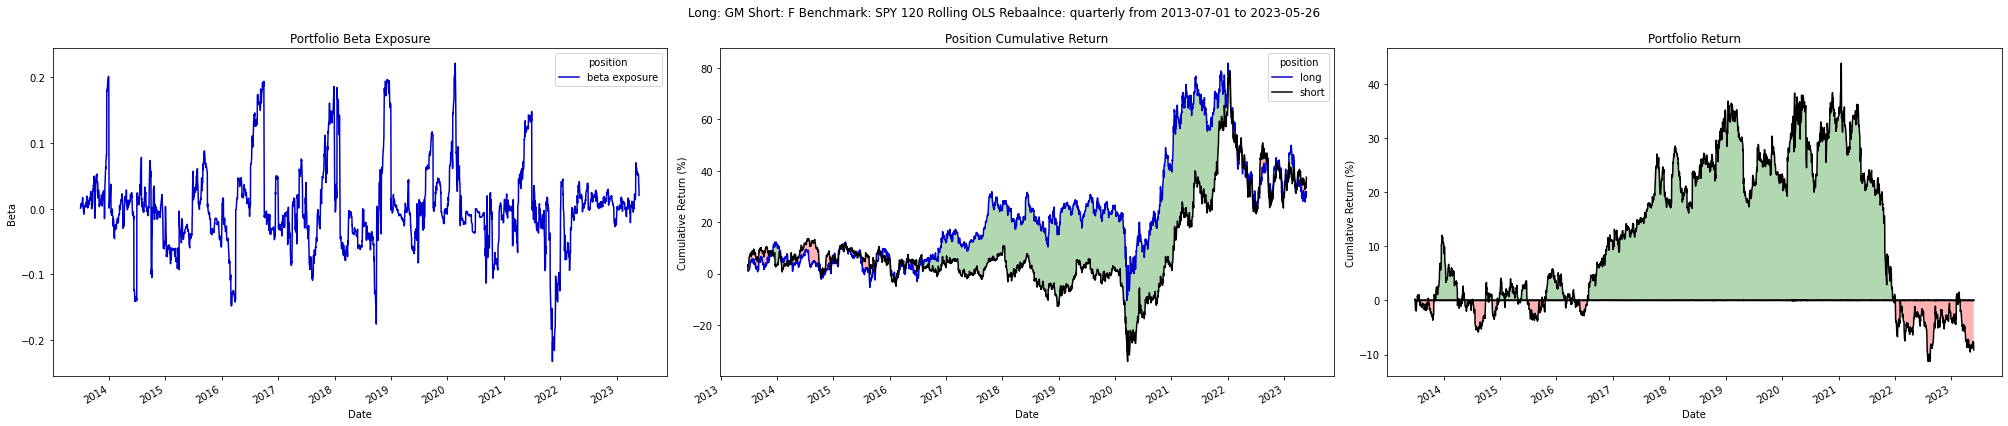

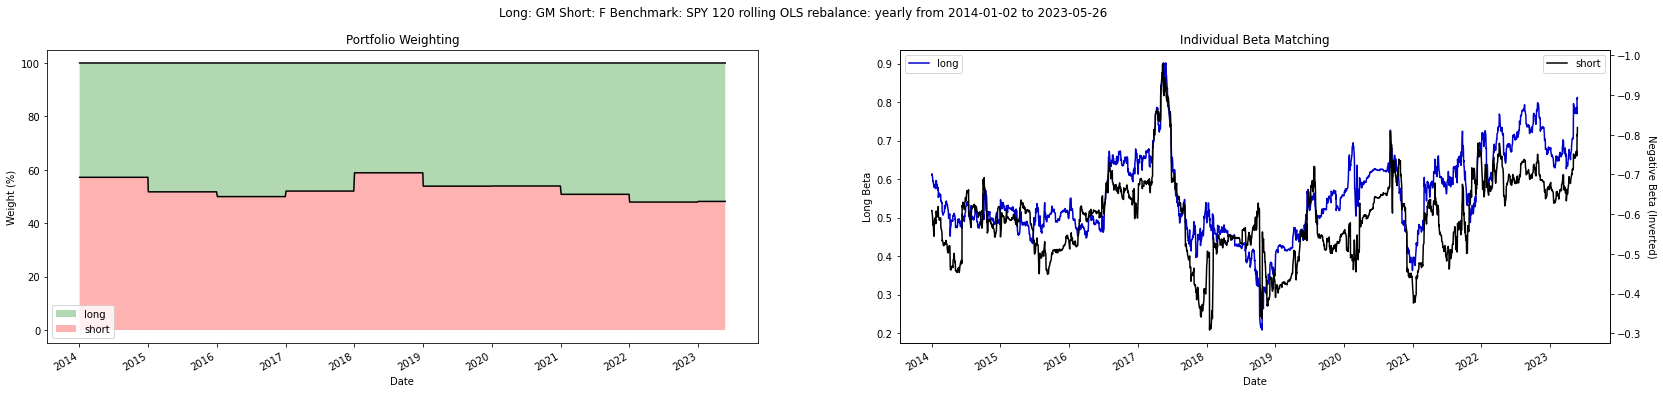

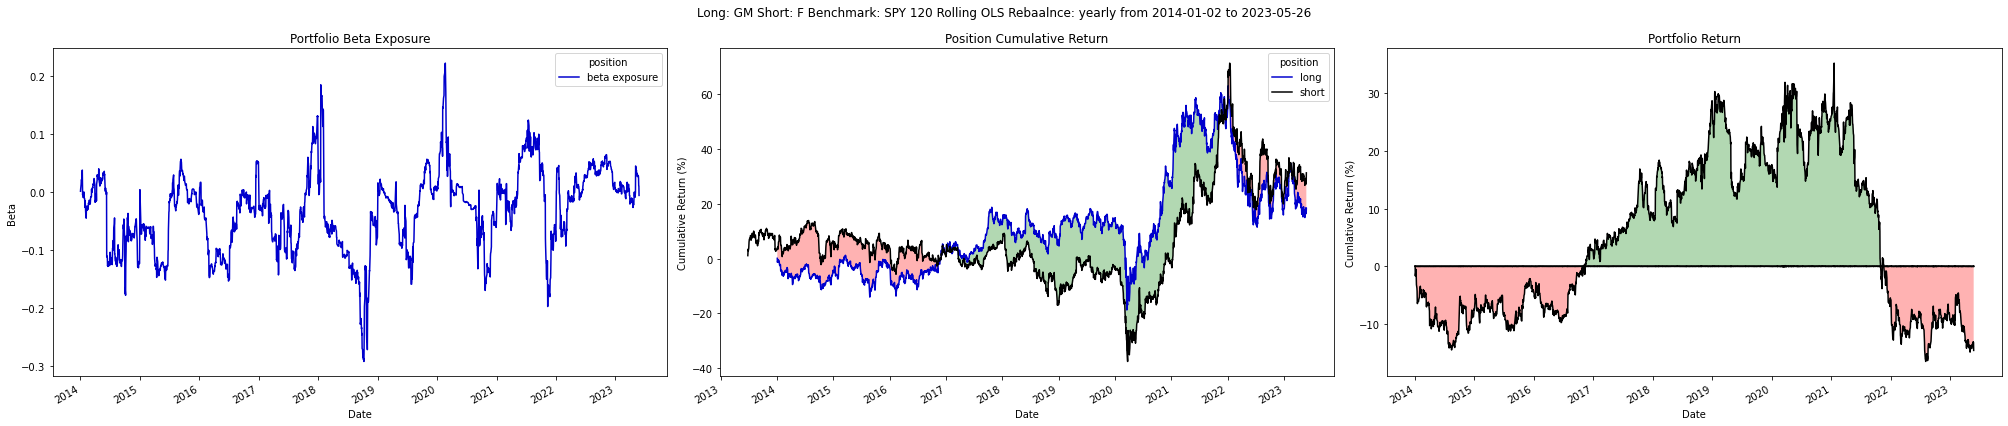

In [4]:
ls_port_car = LSPort(
    long_position = df_car.GM,
    short_position = df_car.F,
    benchmark = df_car.SPY)

ls_port_car_weights = ls_port_car.plot_position_rebalance(
    lookback_window = 120,
    rebalance_method = "daily")

ls_port_car_weights = ls_port_car.plot_position_rebalance(
    lookback_window = 120,
    rebalance_method = "weekly")

ls_port_car_weights = ls_port_car.plot_position_rebalance(
    lookback_window = 120,
    rebalance_method = "monthly")

ls_port_car_weights = ls_port_car.plot_position_rebalance(
    lookback_window = 120,
    rebalance_method = "quarterly")

ls_port_car_weights = ls_port_car.plot_position_rebalance(
    lookback_window = 120,
    rebalance_method = "yearly")

# Long Fallen Angels Short HYG hedging beta via TLT (US 10y Treasury ETF)

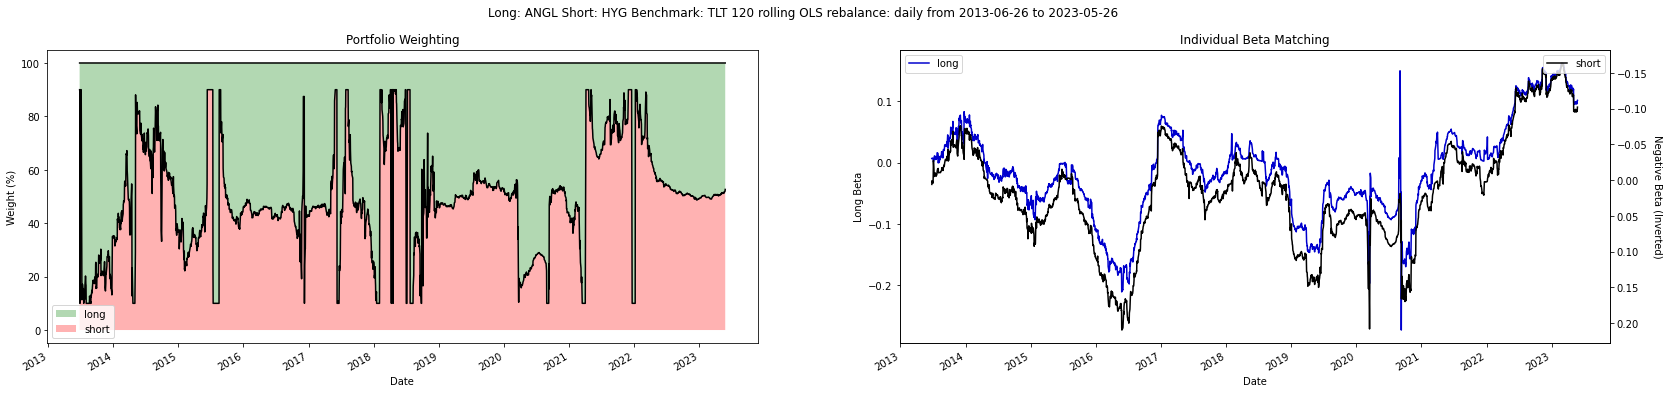

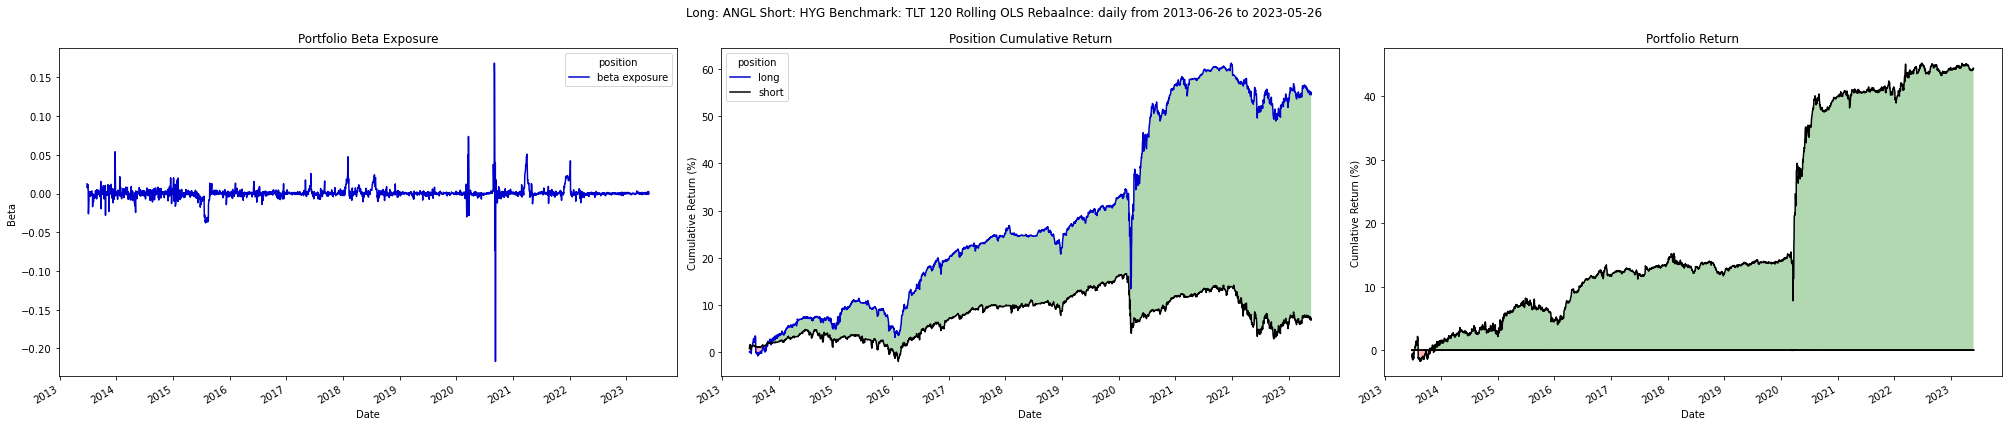

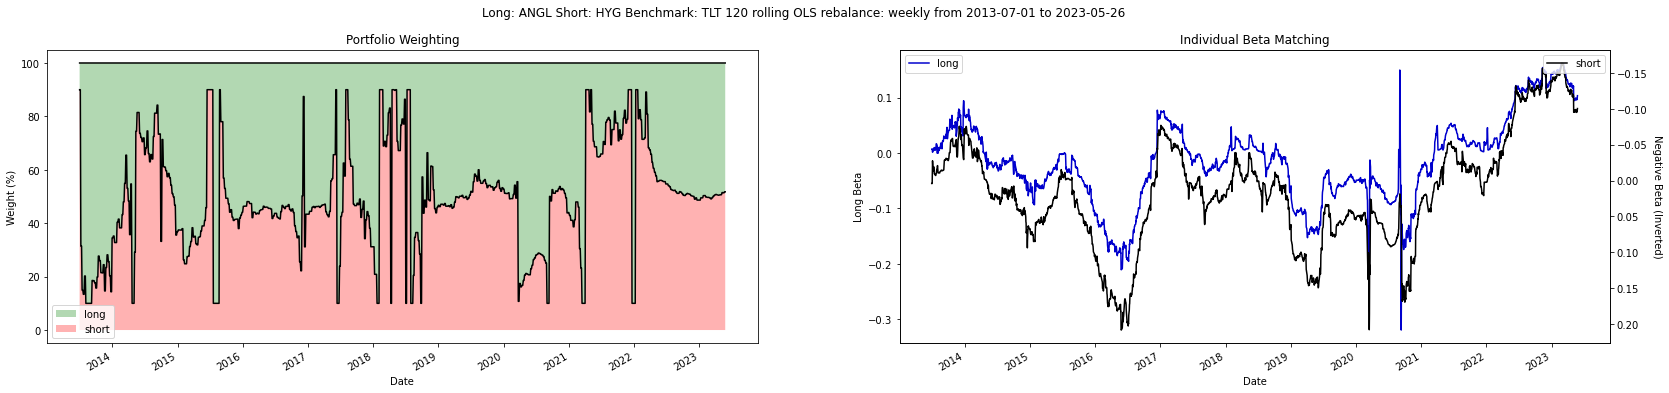

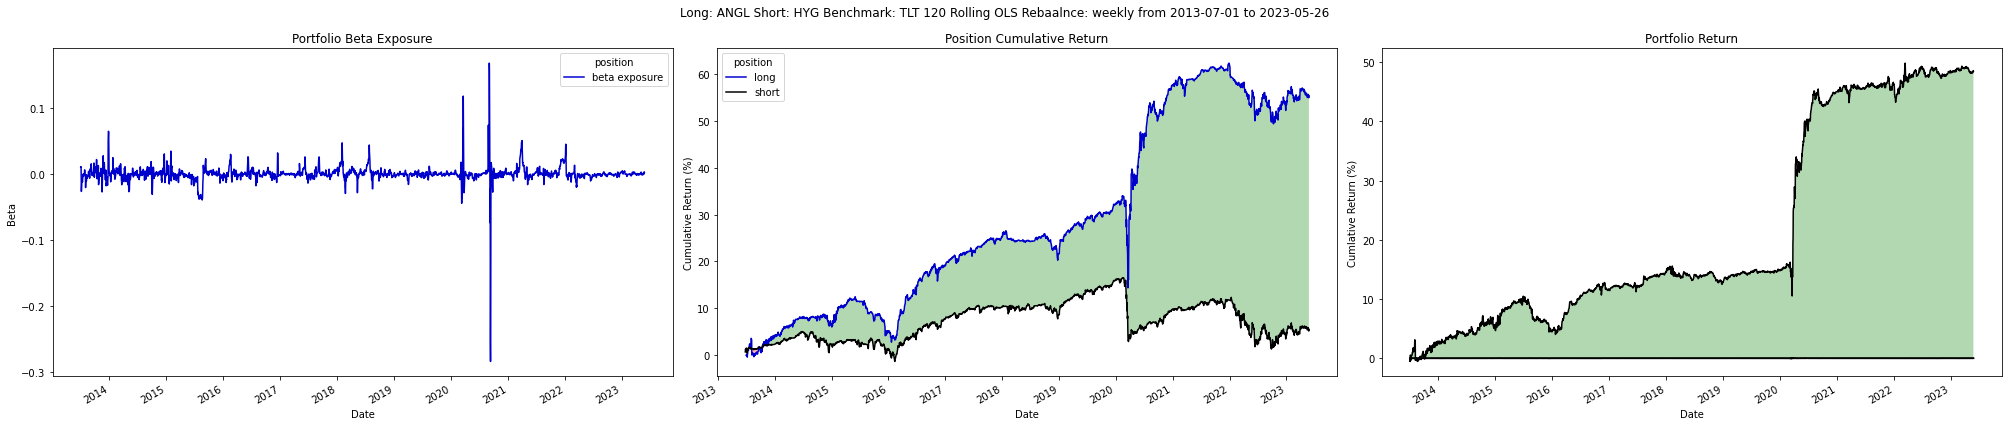

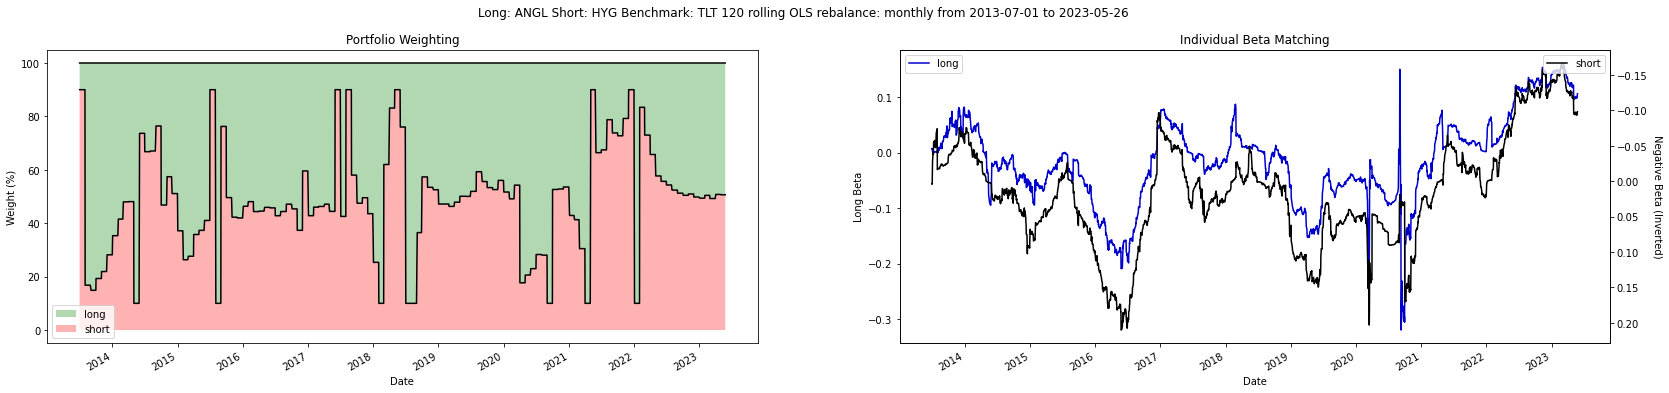

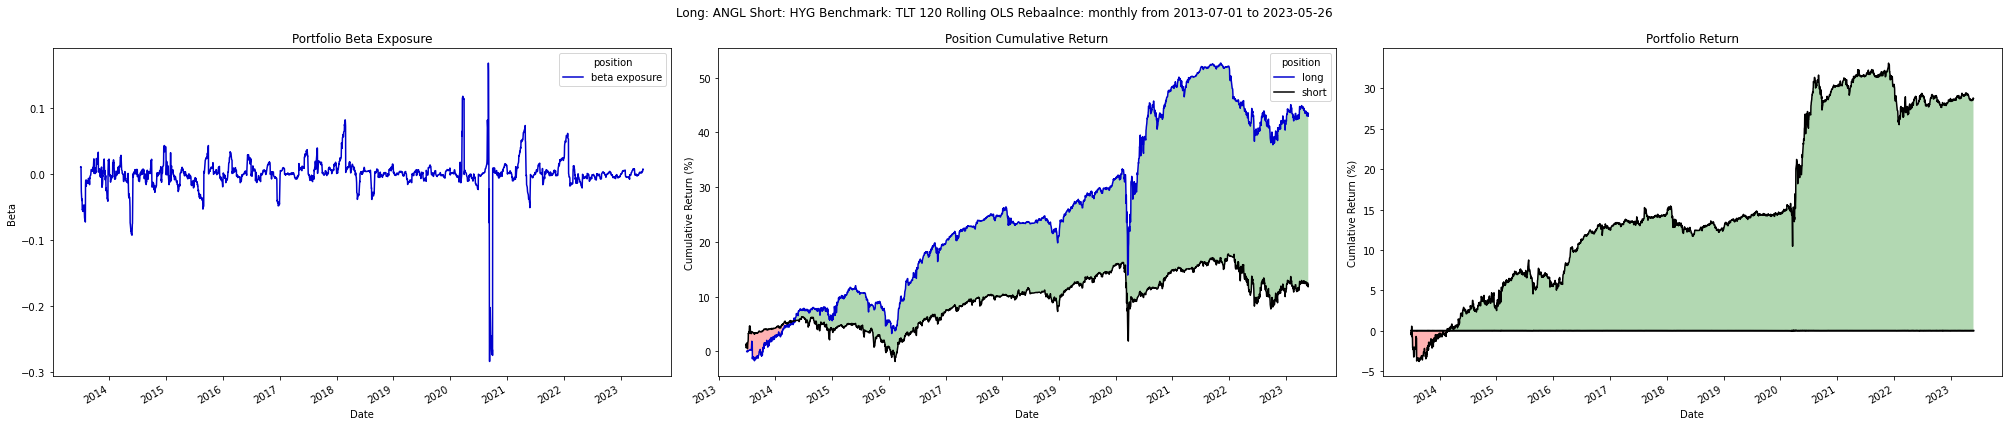

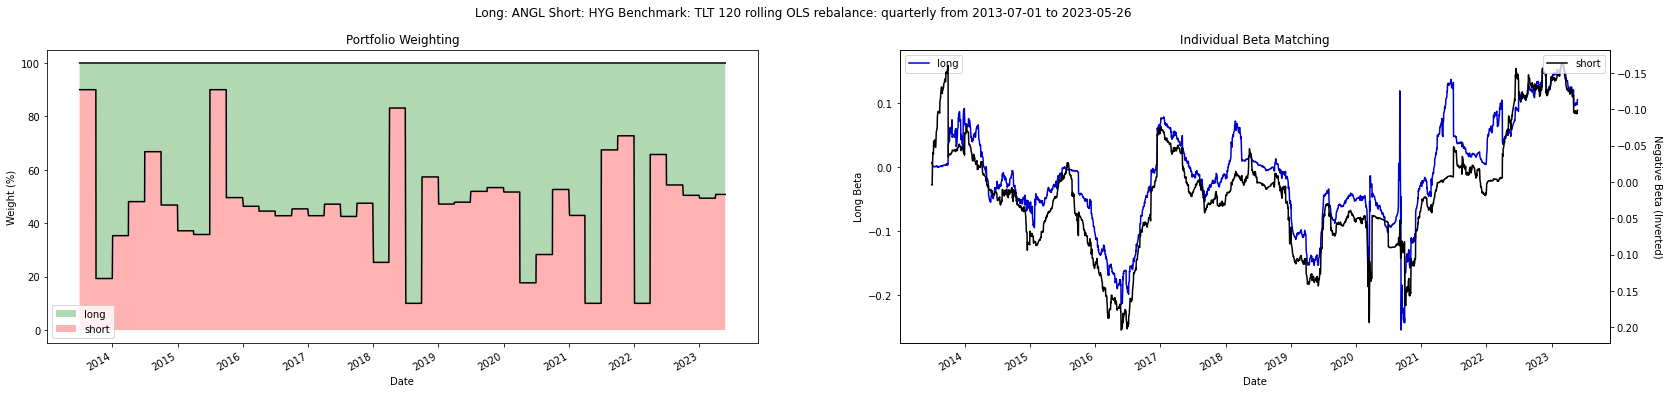

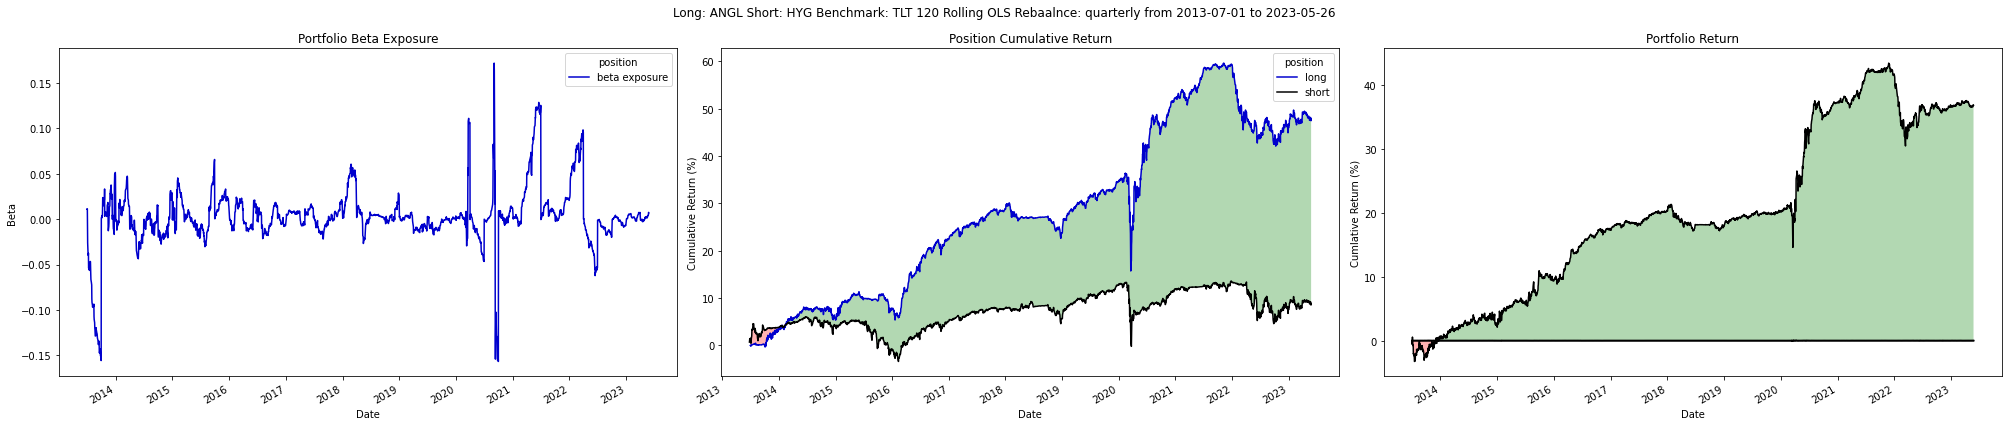

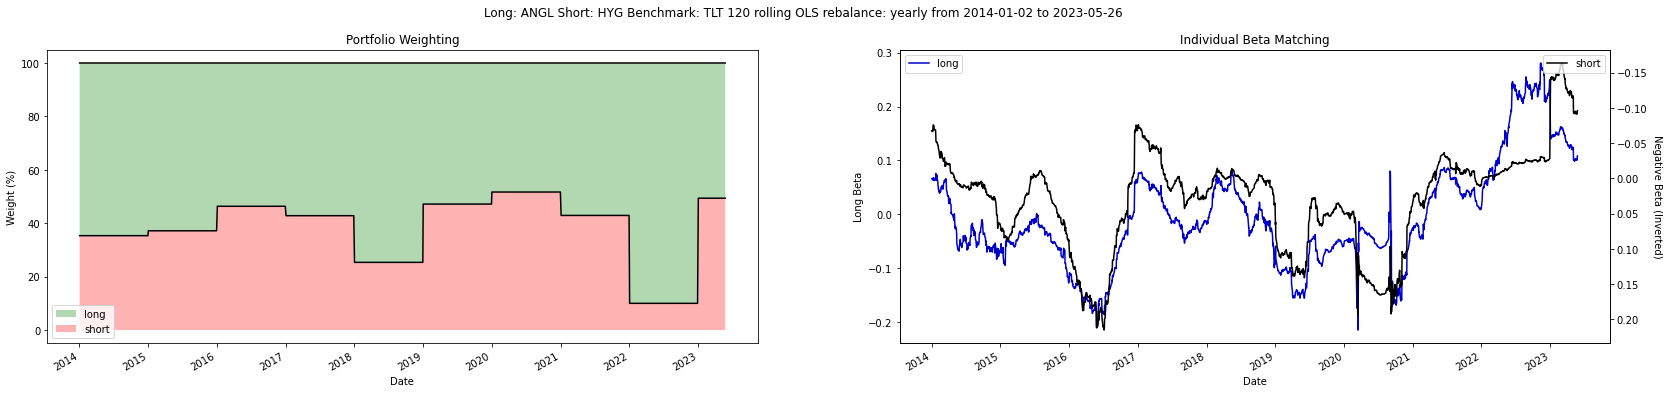

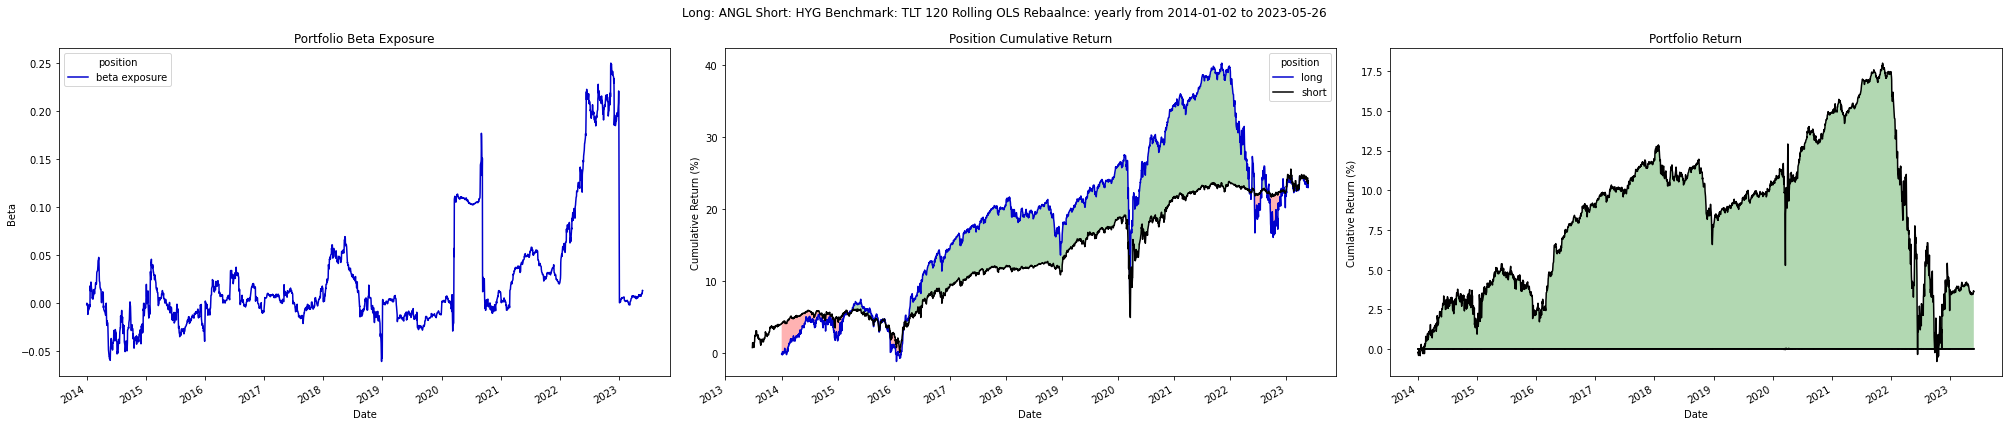

In [5]:
ls_port_fi = LSPort(
    long_position = df_fi.ANGL,
    short_position = df_fi.HYG,
    benchmark = df_fi.TLT)

ls_port_fi_weights = ls_port_fi.plot_position_rebalance(
    lookback_window = 120,
    rebalance_method = "daily")

ls_port_fi_weights = ls_port_fi.plot_position_rebalance(
    lookback_window = 120,
    rebalance_method = "weekly")

ls_port_fi_weights = ls_port_fi.plot_position_rebalance(
    lookback_window = 120,
    rebalance_method = "monthly")

ls_port_fi_weights = ls_port_fi.plot_position_rebalance(
    lookback_window = 120,
    rebalance_method = "quarterly")

ls_port_fi_weights = ls_port_fi.plot_position_rebalance(
    lookback_window = 120,
    rebalance_method = "yearly")